# Peak Flux Distribution Notebook

## Import the libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import integrate 

## Load the spectral catalogue

### Band model

In [2]:
band_Tnum    = []
band_Amp     = []
band_e_Amp   = []
band_Alpha   = []
band_e_Alpha = []
band_Beta    = []
band_e_Beta  = []
band_Epeak   = []
band_e_Epeak = []
band_Eflnc   = []
band_e_Eflnc = []
band_Chisq   = []
band_dof     = []

with open('./spectral_catalogues/goldstein13_apjs_table6.txt', 'r') as f:
    for line in f.readlines()[32:2177]:
        words = line.split()
        band_Tnum.append(    int(   words[0]  ))
        band_Amp.append(     float( words[4]  ))
        band_e_Amp.append(   float( words[5]  ))
        band_Alpha.append(   float( words[6]  ))
        band_e_Alpha.append( float( words[7]  ))
        band_Beta.append(    float( words[8]  ))
        band_e_Beta.append(  float( words[9]  ))
        band_Epeak.append(   float( words[10] ))
        band_e_Epeak.append( float( words[11] ))
        band_Eflnc.append(   float( words[18] ))
        band_e_Eflnc.append( float( words[19] ))
        band_Chisq.append(   float( words[20] ))
        band_dof.append(     float( words[21] ))

### Cutoff power law model

In [3]:
comp_Amp     = []
comp_e_Amp   = []
comp_Index   = []
comp_e_Index = []
comp_Epeak   = []
comp_e_Epeak = []
comp_Eflnc   = []
comp_e_Eflnc = []
comp_Chisq   = []
comp_dof     = []

with open('./spectral_catalogues/goldstein13_apjs_table7.txt', 'r') as f:
    for line in f.readlines()[30:2175]:
        words = line.split()
        comp_Amp.append(     float(words[4]  ) )
        comp_e_Amp.append(   float(words[5]  ) )
        comp_Index.append(   float(words[6]  ) )
        comp_e_Index.append( float(words[7]  ) )
        comp_Epeak.append(   float(words[8]  ) )
        comp_e_Epeak.append( float(words[9]  ) )
        comp_Eflnc.append(   float(words[16] ) )
        comp_e_Eflnc.append( float(words[17] ) )
        comp_Chisq.append(   float(words[18] ) )
        comp_dof.append(     float(words[19] ) )

### Power law model

In [4]:
pwrl_Amp     = []
pwrl_e_Amp   = []
pwrl_Index   = []
pwrl_e_Index = []
pwrl_Eflnc   = []
pwrl_e_Eflnc = []
pwrl_Chisq   = []
pwrl_dof     = []

with open('./spectral_catalogues/goldstein13_apjs_table9.txt', 'r') as f:
    for line in f.readlines()[28:2173]:
        words = line.split()
        pwrl_Amp.append(     float(words[4]  ) )
        pwrl_e_Amp.append(   float(words[5]  ) )
        pwrl_Index.append(   float(words[6]  ) )
        pwrl_e_Index.append( float(words[7]  ) )
        pwrl_Eflnc.append(   float(words[14] ) )
        pwrl_e_Eflnc.append( float(words[15] ) )
        pwrl_Chisq.append(   float(words[16] ) )
        pwrl_dof.append(     float(words[17] ) )

### Smoothly broken power law model

In [5]:
sbpl_Amp      = []
sbpl_e_Amp    = []
sbpl_Alpha    = []
sbpl_e_Alpha  = []
sbpl_Beta     = []
sbpl_e_Beta   = []
sbpl_Ebreak   = []
sbpl_e_Ebreak = []
sbpl_Epeak    = []
sbpl_e_Epeak  = []
sbpl_Eflnc    = []
sbpl_e_Eflnc  = []
sbpl_Chisq    = []
sbpl_dof      = []

with open('./spectral_catalogues/goldstein13_apjs_table10.txt', 'r') as f:
    for line in f.readlines()[34:2179]:
        words = line.split()
        sbpl_Amp.append(      float(words[4]  ) )
        sbpl_e_Amp.append(    float(words[5]  ) )
        sbpl_Alpha.append(    float(words[6]  ) )
        sbpl_e_Alpha.append(  float(words[7]  ) )
        sbpl_Beta.append(     float(words[8]  ) )
        sbpl_e_Beta.append(   float(words[9]  ) )
        sbpl_Ebreak.append(   float(words[10] ) )
        sbpl_e_Ebreak.append( float(words[11] ) )
        sbpl_Epeak.append(    float(words[12] ) )
        sbpl_e_Epeak.append(  float(words[13] ) )
        sbpl_Eflnc.append(    float(words[20] ) )
        sbpl_e_Eflnc.append(  float(words[21] ) )
        sbpl_Chisq.append(    float(words[22] ) )
        sbpl_dof.append(      float(words[23] ) )

### Gaussian parameterized with logarithmic energies

In [6]:
# glog_Amp     = []
# glog_e_Amp   = []
# glog_FWHM    = []
# glog_e_FWHM  = []
# glog_Ecent   = []
# glog_e_Ecent = []
# glog_Epeak   = []
# glog_e_Epeak = []
# glog_Eflnc   = []
# glog_e_Eflnc = []
# glog_Chisq   = []
# glog_dof     = []

# with open('./spectral_catalogues/goldstein13_apjs_table8.txt', 'r') as f:
#     for line in f.readlines()[32:2177]:
#         words = line.split()
#         glog_Amp.append(     float( words[4]  ))
#         glog_e_Amp.append(   float( words[5]  ))
#         glog_FWHM.append(    float( words[6]  ))
#         glog_e_FWHM.append(  float( words[7]  ))
#         glog_Ecent.append(   float( words[8]  ))
#         glog_e_Ecent.append( float( words[9]  ))
#         glog_Epeak.append(   float( words[10] ))
#         glog_e_Epeak.append( float( words[11] ))
#         glog_Eflnc.append(   float( words[18] ))
#         glog_e_Eflnc.append( float( words[19] ))
#         glog_Chisq.append(   float( words[20] ))
#         glog_dof.append(     float( words[21] ))

In [7]:
# Sanity check
len(band_Amp) == len(comp_Amp) == len(pwrl_Amp) == len(sbpl_Amp)

True

## Define the best sample

In [11]:
dict = {'Tnum':      [],
        'Model':     [],
        'Amp':       [],
        'e_Amp':     [],
        'Index1':    [],
        'e_Index1':  [],
        'Index2':    [],
        'e_Index2':  [],
        # 'FWHM':      [],
        # 'e_FWHM':    [],
        # 'Ecent':     [],
        # 'e_Ecent':   [],
        'Ebreak':    [],
        'e_Ebreak':  [],
        'Epeak':     [],
        'e_Epeak':   [],
        'Eflnc':     [],
        'e_Eflnc':   [],
        'Chisq/dof': []}

for i in range(len(band_Tnum)):
    dict['Tnum'].append(band_Tnum[i])
    
    # Index1 array 
    # Index1_arr = np.array([pwrl_Index[i], 
    #                        comp_Index[i], 
    #                        band_Alpha[i], 
    #                        sbpl_Alpha[i]])
    
    # e_Index1 array
    # e_Index1_arr = np.array([pwrl_e_Index[i], 
    #                          comp_e_Index[i], 
    #                          band_e_Alpha[i], 
    #                          sbpl_e_Alpha[i]])
    
    # Index2 array 
    # Index2_arr = np.array([float('nan'),
    #                        float('nan'),
    #                        band_Beta[i], 
    #                        sbpl_Beta[i]])
    
    # e_Index2 array
    # e_Index2_arr = np.array([float('nan'),
    #                          float('nan'),
    #                          band_e_Beta[i], 
    #                          sbpl_e_Beta[i]])

    # Chisq Goodness-of-Fit Statistic array
    Chisq_arr = np.array([pwrl_Chisq[i], 
                          comp_Chisq[i], 
                          band_Chisq[i], 
                          # glog_Chisq[i], 
                          sbpl_Chisq[i]])
    
    Chisq_bst = Chisq_arr[0]
    for j in range(len(Chisq_arr)-1):
        if Chisq_bst - Chisq_arr[j+1] >= 6:
            Chisq_bst = Chisq_arr[j+1]
        # if j != 2 and Chisq_bst - Chisq_arr[j+1] >= 6:
        #     Chisq_bst = Chisq_arr[j+1]
        # if j == 2 and Chisq_bst > Chisq_arr[j+1]:
        #     Chisq_bst = Chisq_arr[j+1]

    if Chisq_bst == Chisq_arr[0]:
        dict[ 'Model'     ].append( 'PWRL'                   )
        dict[ 'Amp'       ].append( pwrl_Amp[i]              )
        dict[ 'e_Amp'     ].append( pwrl_e_Amp[i]            )
        dict[ 'Index1'    ].append( pwrl_Index[i]            )
        dict[ 'e_Index1'  ].append( pwrl_e_Index[i]          )
        dict[ 'Index2'    ].append( float('nan')             )
        dict[ 'e_Index2'  ].append( float('nan')             )
        # dict[ 'FWHM'      ].append( float('nan')             )
        # dict[ 'e_FWHM'    ].append( float('nan')             )
        # dict[ 'Ecent'     ].append( float('nan')             )
        # dict[ 'e_Ecent'   ].append( float('nan')             )
        dict[ 'Ebreak'    ].append( float('nan')             )
        dict[ 'e_Ebreak'  ].append( float('nan')             )
        dict[ 'Epeak'     ].append( float('nan')             )
        dict[ 'e_Epeak'   ].append( float('nan')             )
        dict[ 'Eflnc'     ].append( pwrl_Eflnc[i]            )
        dict[ 'e_Eflnc'   ].append( pwrl_e_Eflnc[i]          )
        dict[ 'Chisq/dof' ].append( Chisq_arr[0]/pwrl_dof[i] )
    elif Chisq_bst == Chisq_arr[1]:
        dict[ 'Model'     ].append( 'COMP'                   )
        dict[ 'Amp'       ].append( comp_Amp[i]              )
        dict[ 'e_Amp'     ].append( comp_e_Amp[i]            )
        dict[ 'Index1'    ].append( comp_Index[i]            )
        dict[ 'e_Index1'  ].append( comp_e_Index[i]          )
        dict[ 'Index2'    ].append( float('nan')             )
        dict[ 'e_Index2'  ].append( float('nan')             )
        # dict[ 'FWHM'      ].append( float('nan')             )
        # dict[ 'e_FWHM'    ].append( float('nan')             )
        # dict[ 'Ecent'     ].append( float('nan')             )
        # dict[ 'e_Ecent'   ].append( float('nan')             )
        dict[ 'Ebreak'    ].append( float('nan')             )
        dict[ 'e_Ebreak'  ].append( float('nan')             )
        dict[ 'Epeak'     ].append( comp_Epeak[i]            )
        dict[ 'e_Epeak'   ].append( comp_e_Epeak[i]          )
        dict[ 'Eflnc'     ].append( comp_Eflnc[i]            )
        dict[ 'e_Eflnc'   ].append( comp_e_Eflnc[i]          )
        dict[ 'Chisq/dof' ].append( Chisq_arr[1]/comp_dof[i] )
    elif Chisq_bst == Chisq_arr[2]:
        dict[ 'Model'     ].append( 'BAND'                   )
        dict[ 'Amp'       ].append( band_Amp[i]              )
        dict[ 'e_Amp'     ].append( band_e_Amp[i]            )
        dict[ 'Index1'    ].append( band_Alpha[i]            )
        dict[ 'e_Index1'  ].append( band_e_Alpha[i]          )
        dict[ 'Index2'    ].append( band_Beta[i]             )
        dict[ 'e_Index2'  ].append( band_e_Beta[i]           )
        # dict[ 'FWHM'      ].append( float('nan')             )
        # dict[ 'e_FWHM'    ].append( float('nan')             )
        # dict[ 'Ecent'     ].append( float('nan')             )
        # dict[ 'e_Ecent'   ].append( float('nan')             )
        dict[ 'Ebreak'    ].append( float('nan')             )
        dict[ 'e_Ebreak'  ].append( float('nan')             )
        dict[ 'Epeak'     ].append( band_Epeak[i]            )
        dict[ 'e_Epeak'   ].append( band_e_Epeak[i]          )
        dict[ 'Eflnc'     ].append( band_Eflnc[i]            )
        dict[ 'e_Eflnc'   ].append( band_e_Eflnc[i]          )
        dict[ 'Chisq/dof' ].append( Chisq_arr[2]/band_dof[i] )
    # elif Chisq_bst == Chisq_arr[3]:
    #     dict[ 'Model'     ].append( 'GLOGE'                  )
    #     dict[ 'Amp'       ].append( glog_Amp[i]              )
    #     dict[ 'e_Amp'     ].append( glog_e_Amp[i]            )
    #     dict[ 'Index1'    ].append( float('nan')             )
    #     dict[ 'e_Index1'  ].append( float('nan')             )
    #     dict[ 'Index2'    ].append( float('nan')             )
    #     dict[ 'e_Index2'  ].append( float('nan')             )
    #     dict[ 'FWHM'      ].append( glog_FWHM[i]             )
    #     dict[ 'e_FWHM'    ].append( glog_e_FWHM[i]           )
    #     dict[ 'Ecent'     ].append( glog_Ecent[i]            )
    #     dict[ 'e_Ecent'   ].append( glog_e_Ecent[i]          )
    #     dict[ 'Ebreak'    ].append( float('nan')             )
    #     dict[ 'e_Ebreak'  ].append( float('nan')             )
    #     dict[ 'Epeak'     ].append( float('nan')             )
    #     dict[ 'e_Epeak'   ].append( float('nan')             )
    #     dict[ 'Eflnc'     ].append( pwrl_Eflnc[i]            )
    #     dict[ 'e_Eflnc'   ].append( pwrl_e_Eflnc[i]          )
    #     dict[ 'Chisq/dof' ].append( Chisq_arr[3]/glog_dof[i] )   
    elif Chisq_bst == Chisq_arr[3]:
        dict[ 'Model'     ].append( 'SBPL'                   )
        dict[ 'Amp'       ].append( sbpl_Amp[i]              )
        dict[ 'e_Amp'     ].append( sbpl_e_Amp[i]            )
        dict[ 'Index1'    ].append( sbpl_Alpha[i]            )
        dict[ 'e_Index1'  ].append( sbpl_e_Alpha[i]          )
        dict[ 'Index2'    ].append( sbpl_Beta[i]             )
        dict[ 'e_Index2'  ].append( sbpl_e_Beta[i]           )
        # dict[ 'FWHM'      ].append( float('nan')             )
        # dict[ 'e_FWHM'    ].append( float('nan')             )
        # dict[ 'Ecent'     ].append( float('nan')             )
        # dict[ 'e_Ecent'   ].append( float('nan')             )
        dict[ 'Ebreak'    ].append( sbpl_Ebreak[i]           )
        dict[ 'e_Ebreak'  ].append( sbpl_e_Ebreak[i]         )
        dict[ 'Epeak'     ].append( sbpl_Epeak[i]            )
        dict[ 'e_Epeak'   ].append( sbpl_e_Epeak[i]          )
        dict[ 'Eflnc'     ].append( sbpl_Eflnc[i]            )
        dict[ 'e_Eflnc'   ].append( sbpl_e_Eflnc[i]          )
        dict[ 'Chisq/dof' ].append( Chisq_arr[3]/sbpl_dof[i] )

In [12]:
df = pd.DataFrame(dict)
df

,Tnum,Model,Amp,e_Amp,Index1,e_Index1,Index2,e_Index2,Ebreak,e_Ebreak,Epeak,e_Epeak,Eflnc,e_Eflnc,Chisq/dof
0,105,BAND,0.019900,0.001390,-1.00,0.06,-2.94,0.17,NaN,NaN,128.0,3.33,7.630000e-06,1.890000e-07,0.838000
1,107,COMP,0.003080,0.000496,-0.73,0.15,NaN,NaN,NaN,NaN,124.0,4.86,4.470000e-06,1.550000e-07,0.871818
2,108,PWRL,0.000535,0.000091,-1.44,0.19,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-07,7.760000e-08,0.968333
3,109,COMP,0.003600,0.000025,-1.60,0.01,NaN,NaN,NaN,NaN,1630.0,247.00,7.730000e-05,8.350000e-07,0.938182
4,110,PWRL,0.000718,0.000022,-1.68,0.04,NaN,NaN,NaN,NaN,NaN,NaN,3.610000e-06,1.920000e-07,1.455000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,8111,COMP,0.005910,0.000249,-1.55,0.04,NaN,NaN,NaN,NaN,230.0,19.80,7.120000e-06,2.620000e-07,1.072727
2141,8112,COMP,0.001690,0.000336,-1.38,0.20,NaN,NaN,NaN,NaN,212.0,54.40,1.070000e-06,1.410000e-07,0.811818
2142,8116,SBPL,0.002540,0.000029,-1.65,0.03,-2.95,0.52,365.0,105.0,258.0,26.80,1.470000e-05,5.780000e-07,6.991000
2143,8120,COMP,0.003420,0.000255,-0.53,0.14,NaN,NaN,NaN,NaN,585.0,86.40,1.410000e-06,1.360000e-07,1.067273


In [13]:
df = df[(df['Chisq/dof'] >= 0.5) & (df['Chisq/dof'] <= 1.5)]
df

,Tnum,Model,Amp,e_Amp,Index1,e_Index1,Index2,e_Index2,Ebreak,e_Ebreak,Epeak,e_Epeak,Eflnc,e_Eflnc,Chisq/dof
0,105,BAND,0.019900,0.001390,-1.00,0.06,-2.94,0.17,NaN,NaN,128.0,3.33,7.630000e-06,1.890000e-07,0.838000
1,107,COMP,0.003080,0.000496,-0.73,0.15,NaN,NaN,NaN,NaN,124.0,4.86,4.470000e-06,1.550000e-07,0.871818
2,108,PWRL,0.000535,0.000091,-1.44,0.19,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e-07,7.760000e-08,0.968333
3,109,COMP,0.003600,0.000025,-1.60,0.01,NaN,NaN,NaN,NaN,1630.0,247.00,7.730000e-05,8.350000e-07,0.938182
4,110,PWRL,0.000718,0.000022,-1.68,0.04,NaN,NaN,NaN,NaN,NaN,NaN,3.610000e-06,1.920000e-07,1.455000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,8110,COMP,0.004870,0.000243,-0.40,0.08,NaN,NaN,NaN,NaN,425.0,27.10,3.840000e-06,1.830000e-07,1.002727
2140,8111,COMP,0.005910,0.000249,-1.55,0.04,NaN,NaN,NaN,NaN,230.0,19.80,7.120000e-06,2.620000e-07,1.072727
2141,8112,COMP,0.001690,0.000336,-1.38,0.20,NaN,NaN,NaN,NaN,212.0,54.40,1.070000e-06,1.410000e-07,0.811818
2143,8120,COMP,0.003420,0.000255,-0.53,0.14,NaN,NaN,NaN,NaN,585.0,86.40,1.410000e-06,1.360000e-07,1.067273


In [48]:
df[ df['Tnum'] == 7735 ]

,Tnum,Model,Amp,e_Amp,Index1,e_Index1,Index2,e_Index2,Ebreak,e_Ebreak,Epeak,e_Epeak,Eflnc,e_Eflnc,Chisq/dof
1993,7735,BAND,0.00173,0.0,0.66,0.0,-23.28,0.0,NaN,NaN,307.0,0.0,1.080000e-07,0.0,1.415


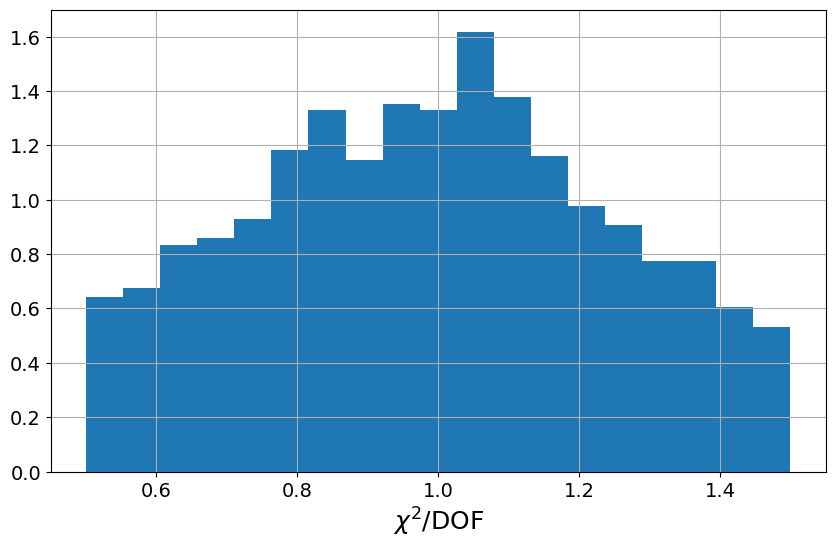

In [15]:
# Plot the reduced Chisq distribution
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(df['Chisq/dof'], 
        bins=np.linspace(df['Chisq/dof'].min(), 
                         df['Chisq/dof'].max(), 
                         20),
                         density=True)
ax.set_xlabel(r'$\chi^2/\mathrm{DOF}$', size=18)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.grid(which='both')
plt.show()

In [14]:
# band_df = df[ df[ 'Model' ] == 'BAND'  ]
# comp_df = df[ df[ 'Model' ] == 'COMP'  ]
# glog_df = df[ df[ 'Model' ] == 'GLOGE' ]
# pwrl_df = df[ df[ 'Model' ] == 'PWRL'  ]
# sbpl_df = df[ df[ 'Model' ] == 'SBPL'  ]

### Comparing the fluences of different models

#### Band model

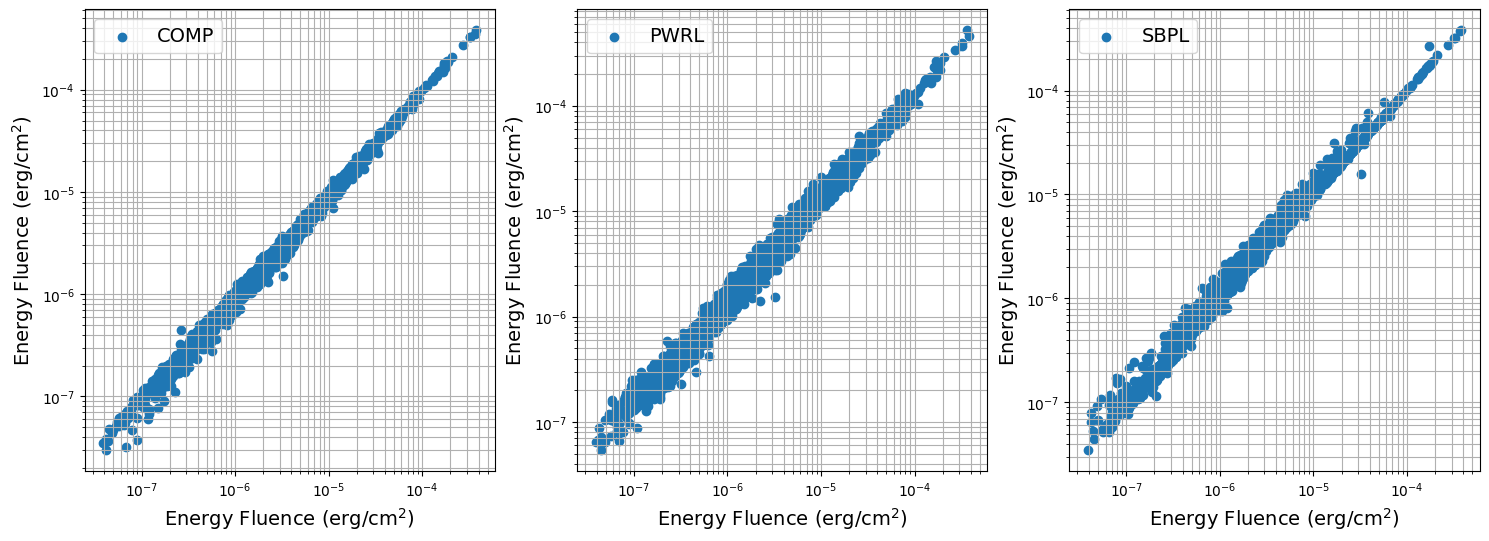

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].scatter(x=band_Eflnc, y=comp_Eflnc, label='COMP')
ax[0].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=10)
ax[0].grid(which='both')
ax[0].legend(fontsize=14)
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].scatter(x=band_Eflnc, y=pwrl_Eflnc, label='PWRL')
ax[1].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].grid(which='both')
ax[1].legend(fontsize=14)
ax[1].loglog()
################################################################################
# 3rd plot
################################################################################
ax[2].scatter(x=band_Eflnc, y=sbpl_Eflnc, label='SBPL')
ax[2].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].xaxis.set_tick_params(labelsize=10)
ax[2].yaxis.set_tick_params(labelsize=10)
ax[2].grid(which='both')
ax[2].legend(fontsize=14)
ax[2].loglog()
plt.show()

#### Cutoff power law model

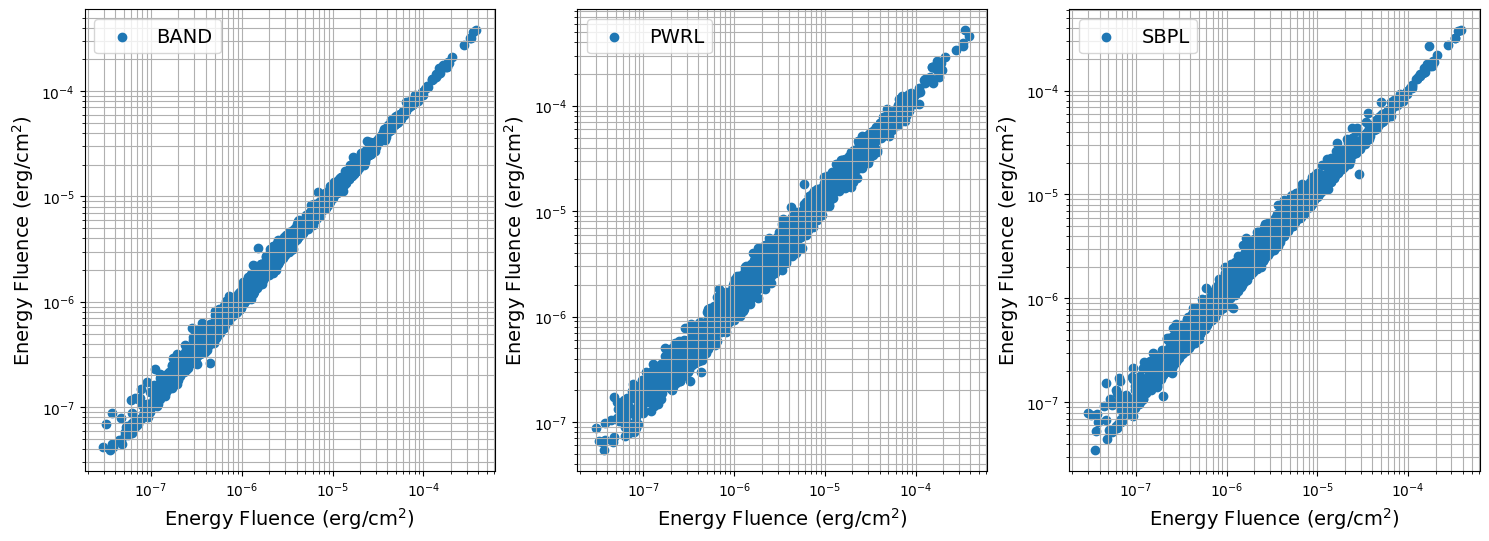

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].scatter(x=comp_Eflnc, y=band_Eflnc, label='BAND')
ax[0].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=10)
ax[0].grid(which='both')
ax[0].legend(fontsize=14)
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].scatter(x=comp_Eflnc, y=pwrl_Eflnc, label='PWRL')
ax[1].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].grid(which='both')
ax[1].legend(fontsize=14)
ax[1].loglog()
################################################################################
# 3rd plot
################################################################################
ax[2].scatter(x=comp_Eflnc, y=sbpl_Eflnc, label='SBPL')
ax[2].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].xaxis.set_tick_params(labelsize=10)
ax[2].yaxis.set_tick_params(labelsize=10)
ax[2].grid(which='both')
ax[2].legend(fontsize=14)
ax[2].loglog()
plt.show()

#### Power law model

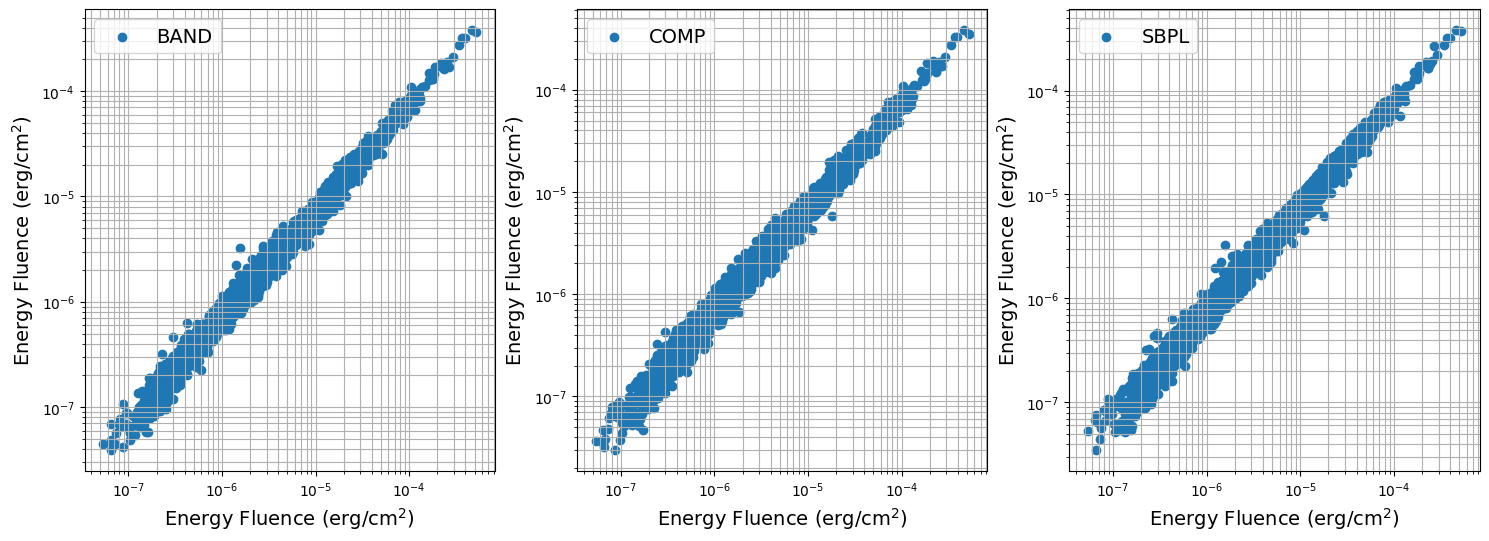

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].scatter(x=pwrl_Eflnc, y=band_Eflnc, label='BAND')
ax[0].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=10)
ax[0].grid(which='both')
ax[0].legend(fontsize=14)
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].scatter(x=pwrl_Eflnc, y=comp_Eflnc, label='COMP')
ax[1].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].grid(which='both')
ax[1].legend(fontsize=14)
ax[1].loglog()
################################################################################
# 3rd plot
################################################################################
ax[2].scatter(x=pwrl_Eflnc, y=sbpl_Eflnc, label='SBPL')
ax[2].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].xaxis.set_tick_params(labelsize=10)
ax[2].yaxis.set_tick_params(labelsize=10)
ax[2].grid(which='both')
ax[2].legend(fontsize=14)
ax[2].loglog()
plt.show()

#### Smoothly broken power law model

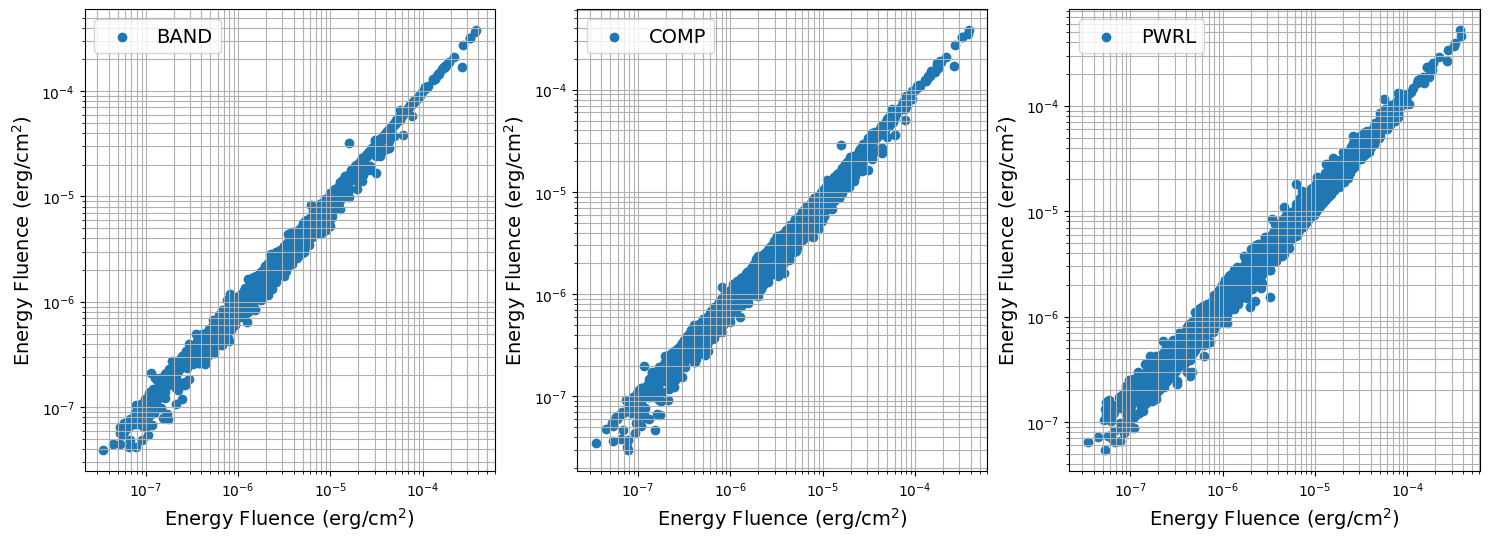

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].scatter(x=sbpl_Eflnc, y=band_Eflnc, label='BAND')
ax[0].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[0].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=10)
ax[0].grid(which='both')
ax[0].legend(fontsize=14)
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].scatter(x=sbpl_Eflnc, y=comp_Eflnc, label='COMP')
ax[1].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[1].yaxis.set_tick_params(labelsize=10)
ax[1].grid(which='both')
ax[1].legend(fontsize=14)
ax[1].loglog()
################################################################################
# 3rd plot
################################################################################
ax[2].scatter(x=sbpl_Eflnc, y=pwrl_Eflnc, label='PWRL')
ax[2].set_xlabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].set_ylabel(r'Energy Fluence (erg/cm$^2$)', size=14)
ax[2].xaxis.set_tick_params(labelsize=10)
ax[2].yaxis.set_tick_params(labelsize=10)
ax[2].grid(which='both')
ax[2].legend(fontsize=14)
ax[2].loglog()
plt.show()

## Define the spectral models

### Band model

In [20]:
def Band(E, E_peak, Alpha, Beta):
    # Amplitude: set equal to 1 (ph/s/cm^2/keV)
    A      = 1.
    E_piv  = 100.
    E_0    = (Alpha-Beta)*E_peak/(Alpha+2)
    case_1 = lambda E: E*A*(E/E_piv)**Alpha*np.exp(-(Alpha+2)*E/E_peak)
    case_2 = lambda E: E*A*(E/E_piv)**Beta*np.exp(Beta-Alpha)*((Alpha-Beta)*E_peak/(E_piv*(Alpha+2)))**(Alpha-Beta)
    return np.piecewise(E, [E >= E_0, E < E_0], [case_1, case_2])

### Cutoff power law model

In [21]:
def Comp(E, E_peak, Alpha):
    # Amplitude: set equal to 1 (ph/cm^2/keV)
    A     = 1.
    E_piv = 100.
    return E*A*(E/E_piv)**Alpha*np.exp(-(Alpha+2)*E/E_peak)

### Power law model

In [22]:
def Pwrl(E, Lambda):
    # Amplitude: set equal to 1 (ph/cm^2/keV)
    A     = 1.
    E_piv = 100.
    return E*A*(E/E_piv)**Lambda

### Smoothly broken power law model

In [23]:
def Sbpl(E, E_b, Lambda_1, Lambda_2):
    # Amplitude: set equal to 1 (ph/cm^2/keV)
    A     = 1.
    b     = (Lambda_1+Lambda_2)/2
    m     = (Lambda_2-Lambda_1)/2
    Delta = 0.3
    E_piv = 100.
    q_piv = np.log(E_piv/E)/Delta
    q     = np.log(E/E_b)/Delta
    a_piv = m*Delta*np.log((np.exp(q_piv)+np.exp(-q_piv))/2)
    a     = m*Delta*np.log((np.exp(q)+np.exp(-q))/2)
    return E*A*(E/E_piv)**b*10**(a-a_piv)

### Gaussian parameterized with logarithmic energies model

In [24]:
# def GLOGE(E, E_cen, FWHM):
#     # Amplitude: set equal to 1 (ph/cm^2/keV)
#     A = 1.
#     s = FWHM/(2*np.sqrt(2*np.log(2)))
#     return E*A/(np.sqrt(2*np.pi)*s)*np.exp(-((np.log10(E)-np.log10(E_cen))/s)**2/2)

## Plot and rescale the distributions

### Define the Broken Power Law distribution

In [25]:
def GeneratePeakFlux(p, alpha, beta, F_break, F_min):
    """This function returns a peak flux value F from the broken-power-law (BPL)
    distribution: 
    
    f(F) = N * (F/F_break)**(-alpha) if F <  F_break;
           N * (F/F_break)**(-beta)  if F >= F_break;
    
    where alpha and beta are the BPL indices, F_break is the break peak flux, 
    and F_min is minimum peak flux. The idea is sampling the CDF, whose values 
    are found between 0 and 1 by definition, and turn them into the 
    corresponding peak flux values.

    Args:
        p       (float): sampled value from the CDF;
        alpha   (float): first BPL index;
        beta    (float): second BPL index;
        F_break (float): break peak flux;
        F_min   (float): minimum peak flux.

    Returns:
        float: the corresponding peak flux value F.
    """
    R_min = F_min/F_break
    f_0   = (F_break*((1-R_min**(1-alpha))/(1-alpha)-1/(1-beta)))**(-1)
    p_0   = f_0*F_break*(1-R_min**(1-alpha))/(1-alpha)
    return np.piecewise(p, [p < p_0, p >= p_0], [lambda p: F_break*(p*(1-alpha)/(f_0*F_break)+R_min**(1-alpha))**(1/(1-alpha)), 
                                                 lambda p: F_break*((p-1)*(1-beta)/(f_0*F_break))**(1/(1-beta))])

### Define the BPL parameters for the three catalogues

In [26]:
################################################################################
# BATSE
################################################################################
batse_alpha_bpl = 1.61
batse_beta_bpl  = 2.19
batse_F_break   = 6.18e-07
batse_F_min     = 4.87e-08
################################################################################
# BAT
################################################################################
swift_alpha_bpl = 1.97
swift_beta_bpl  = 2.55
swift_F_break   = 4.37e-07
swift_F_min     = 1.14e-08
################################################################################
# GBM 
################################################################################
fermi_alpha_bpl = 1.88
fermi_beta_bpl  = 2.56
fermi_F_break   = 3.60e-07
fermi_F_min     = 5.33e-08

### Rescale the BAT and GBM peak flux distributions in the BATSE energy band $(25-2000~\mathrm{keV})$

In [65]:
F_batse = np.zeros(10000)
F_swift = np.zeros(10000)
F_fermi = np.zeros(10000)

R_swift = np.zeros(10000)
R_fermi = np.zeros(10000)

fluence = np.zeros(10000)

for i in range(len(F_batse)):
    # Randomly sample the BATSE's peak flux distribution
    F_batse[i] = GeneratePeakFlux(p       = np.random.rand(), 
                                  alpha   = batse_alpha_bpl, 
                                  beta    = batse_beta_bpl, 
                                  F_break = batse_F_break, 
                                  F_min   = batse_F_min)
    # Randomly sample the BAT's peak flux distribution
    F_bat = GeneratePeakFlux(p       = np.random.rand(), 
                             alpha   = swift_alpha_bpl, 
                             beta    = swift_beta_bpl, 
                             F_break = swift_F_break, 
                             F_min   = swift_F_min)
    # Randomly sample the GBM's peak flux distribution
    F_gbm = GeneratePeakFlux(p       = np.random.rand(), 
                             alpha   = fermi_alpha_bpl, 
                             beta    = fermi_beta_bpl, 
                             F_break = fermi_F_break, 
                             F_min   = fermi_F_min)
    
    # Randomly sample the spectral parameters
    flag = False
    while flag == False:
        j = np.random.randint(low=0, high=df['Tnum'].size)
        Tnum     = df[ 'Tnum'     ].values[j]
        Model    = df[ 'Model'    ].values[j]
        Amp      = df[ 'Amp'      ].values[j]
        e_Amp    = df[ 'e_Amp'    ].values[j]
        Index1   = df[ 'Index1'   ].values[j]
        e_Index1 = df[ 'e_Index1' ].values[j]
        Index2   = df[ 'Index2'   ].values[j]
        e_Index2 = df[ 'e_Index2' ].values[j]
        # FWHM     = df[ 'FWHM'     ].values[j]
        # e_FWHM   = df[ 'e_FWHM'   ].values[j]
        # Ecent    = df[ 'Ecent'    ].values[j]
        # e_Ecent  = df[ 'e_Ecent'  ].values[j]
        Ebreak   = df[ 'Ebreak'   ].values[j]
        e_Ebreak = df[ 'e_Ebreak' ].values[j]
        Epeak    = df[ 'Epeak'    ].values[j]
        e_Epeak  = df[ 'e_Epeak'  ].values[j]
        Eflnc    = df[ 'Eflnc'    ].values[j]
        e_Eflnc  = df[ 'e_Eflnc'  ].values[j]

        # Integrate the spectra
        if Model == 'BAND':
            if (Index1 != 0 and Index2 != 0 and e_Index1 != 0 and e_Index2 != 0 and 
                np.abs(e_Index1/Index1) <= 0.4 and np.abs(e_Index2/Index2) <= 1.0):
                P_batse = integrate.quad(Band, 25, 2000, args=(Epeak, Index1, Index2))
                P_bat   = integrate.quad(Band, 15,  150, args=(Epeak, Index1, Index2))
                P_gbm   = integrate.quad(Band,  8, 1000, args=(Epeak, Index1, Index2))
                fluence[i] = Eflnc
                flag = True
        elif Model == 'COMP':
            if (Index1 != 0 and e_Index1 != 0 and 
                np.abs(e_Index1/Index1) <= 0.4):
                P_batse = integrate.quad(Comp, 25, 2000, args=(Epeak, Index1))
                P_bat   = integrate.quad(Comp, 15,  150, args=(Epeak, Index1))
                P_gbm   = integrate.quad(Comp,  8, 1000, args=(Epeak, Index1))
                fluence[i] = Eflnc
                flag = True
        elif Model == 'PWRL':
            if (Index1 != 0 and e_Index1 != 0 and 
                np.abs(e_Index1/Index1) <= 0.4):
                P_batse = integrate.quad(Pwrl, 25, 2000, args=(Index1))
                P_bat   = integrate.quad(Pwrl, 15,  150, args=(Index1))
                P_gbm   = integrate.quad(Pwrl,  8, 1000, args=(Index1))
                fluence[i] = Eflnc
                flag = True
        elif Model == 'SBPL':
            if (Index1 != 0 and Index2 != 0 and e_Index1 != 0 and e_Index2 != 0 and 
                np.abs(e_Index1/Index1) <= 0.4 and np.abs(e_Index2/Index2) <= 1.0):
                P_batse = integrate.quad(Sbpl, 25, 2000, args=(Ebreak, Index1, Index2))
                P_bat   = integrate.quad(Sbpl, 15,  150, args=(Ebreak, Index1, Index2))
                P_gbm   = integrate.quad(Sbpl,  8, 1000, args=(Ebreak, Index1, Index2))
                fluence[i] = Eflnc
                flag = True
        # elif Model == 'GLOGE':
        #     P_batse = integrate.quad(GLOGE, 25, 2000, args=(Ecent, FWHM))
        #     P_bat   = integrate.quad(GLOGE, 15,  150, args=(Ecent, FWHM))
        #     P_gbm   = integrate.quad(GLOGE,  8, 1000, args=(Ecent, FWHM))
 
    # Compute the rescaling factors
    R_swift[i] = P_batse[0]/P_bat[0]
    R_fermi[i] = P_batse[0]/P_gbm[0]
    
    # print('%s %s %e %e %e %e %e' % (Tnum, 
    #                                 Model, 
    #                                 P_batse[0], 
    #                                 P_bat[0], 
    #                                 P_gbm[0], 
    #                                 R_swift[i], 
    #                                 R_fermi[i]))
    
    # Rescale the BAT peak flux
    F_swift[i] = R_swift[i]*F_bat
    
    # Rescale the GBM peak flux
    F_fermi[i] = R_fermi[i]*F_gbm

### Plot the rescaling factors distributions

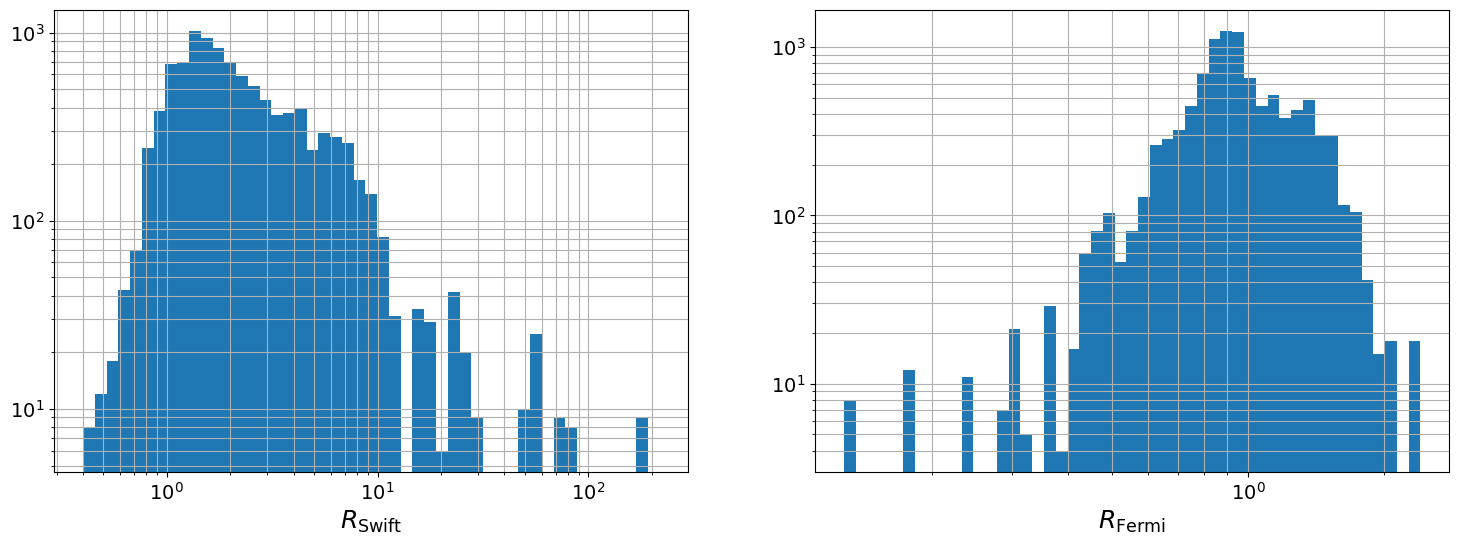

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].hist(R_swift, bins=np.logspace(np.log10(min(R_swift)), np.log10(max(R_swift)), 50))
ax[0].set_xlabel(r'$R_{\mathrm{Swift}}$', size=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].grid(which='both')
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].hist(R_fermi, bins=np.logspace(np.log10(min(R_fermi)), np.log10(max(R_fermi)), 50))
ax[1].set_xlabel(r'$R_{\mathrm{Fermi}}$', size=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].grid(which='both')
ax[1].loglog()
plt.show()

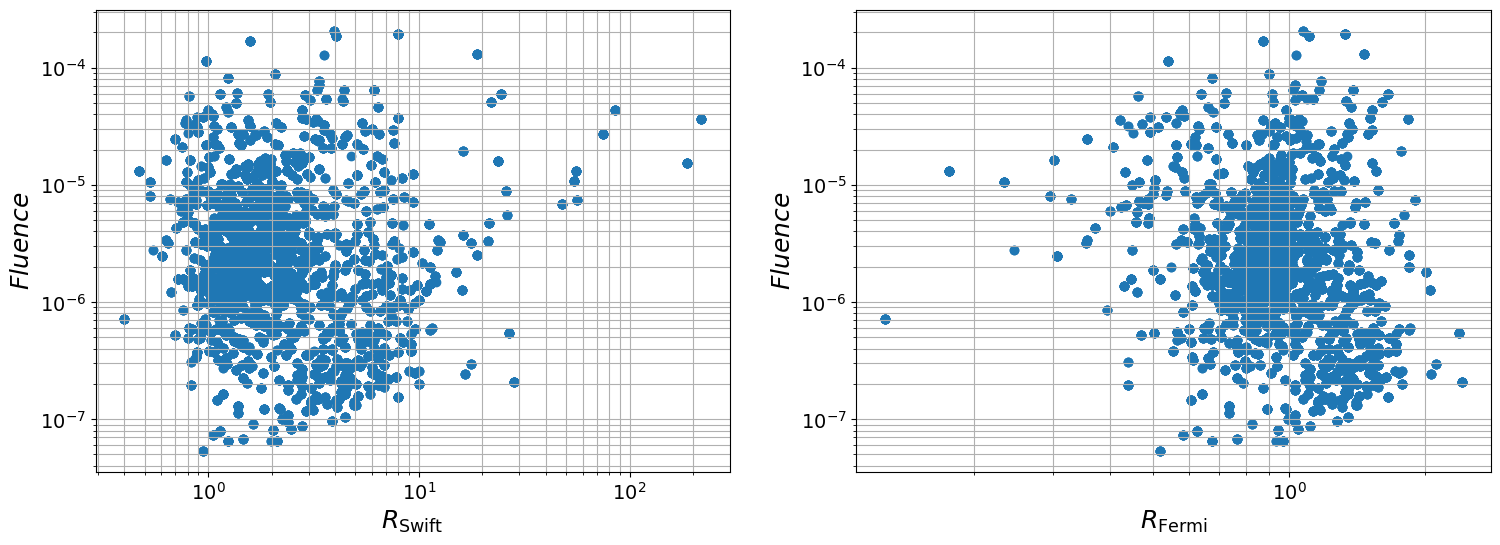

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
################################################################################
# 1st plot
################################################################################
ax[0].scatter(R_swift, fluence)
ax[0].set_xlabel(r'$R_{\mathrm{Swift}}$', size=18)
ax[0].set_ylabel(r'$Fluence$', size=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].grid(which='both')
ax[0].loglog()
################################################################################
# 2nd plot
################################################################################
ax[1].scatter(R_fermi, fluence) 
ax[1].set_xlabel(r'$R_{\mathrm{Fermi}}$', size=18)
ax[1].set_ylabel(r'$Fluence$', size=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].grid(which='both')
ax[1].loglog()
plt.show()

### Plot the distributions

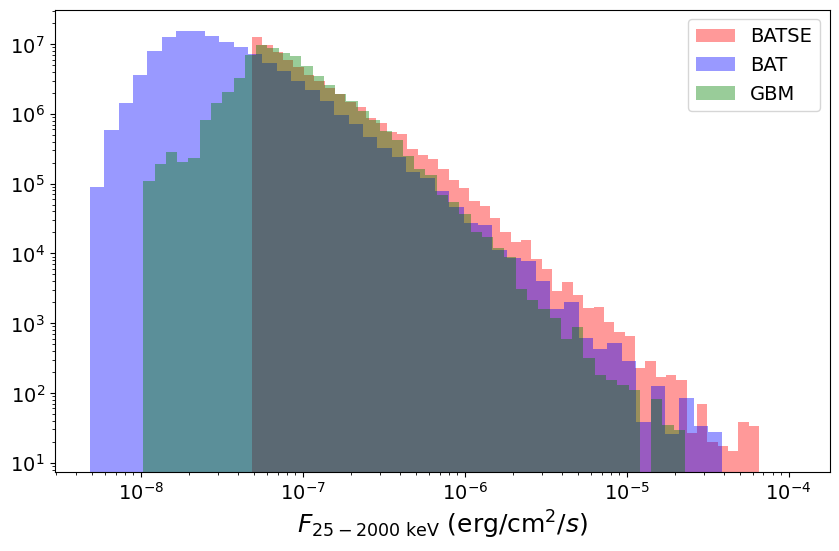

In [69]:
# x_batse = np.logspace(np.log10(np.min(F_batse)), 
#                       np.log10(np.max(F_batse)), 
#                       256)
# x_swift = np.logspace(np.log10(np.min(F_swift)), 
#                       np.log10(np.max(F_swift)), 
#                       256)
# x_fermi = np.logspace(np.log10(np.min(F_fermi)), 
#                       np.log10(np.max(F_fermi)), 
#                       256)

# y_batse = BrokenPowerLaw(x_batse, 
#                          batse_alpha_bpl, 
#                          batse_beta_bpl, 
#                          batse_F_break, 
#                          batse_F_min)
# y_swift = BrokenPowerLaw(x_swift, 
#                          swift_alpha_bpl, 
#                          swift_beta_bpl, 
#                          swift_F_break, 
#                          swift_F_min)
# y_fermi = BrokenPowerLaw(x_fermi, 
#                          fermi_alpha_bpl, 
#                          fermi_beta_bpl, 
#                          fermi_F_break, 
#                          fermi_F_min)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
counts_batse, bins_batse, _ = ax.hist(F_batse, 
                                      bins=np.logspace(np.log10(np.min(F_batse)), 
                                                       np.log10(np.max(F_batse)), 
                                                       50), 
                                      label='BATSE', 
                                      alpha=0.4, color='red',density=True)
counts_swift, bins_swift, _ = ax.hist(F_swift, 
                                      bins=np.logspace(np.log10(np.min(F_swift)), 
                                                       np.log10(np.max(F_swift)), 
                                                       50), 
                                      label='BAT', 
                                      alpha=0.4, color='blue', density=True)
counts_fermi, bins_fermi, _ = ax.hist(F_fermi, 
                                      bins=np.logspace(np.log10(np.min(F_fermi)), 
                                                       np.log10(np.max(F_fermi)), 
                                                       50), 
                                      label='GBM', 
                                      alpha=0.4, color='green', density=True)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel(r'$F_{25-2000~\mathrm{keV}}$ (erg/cm$^2/s$)', size=18)
ax.loglog()
# ax.grid(which='both')
ax.legend(fontsize=14)
plt.show()